In [235]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
%matplotlib inline

In [236]:
data = pd.read_csv('/home/mikhail/Рабочий стол/Geek_Script_2605/Kurs_project_task/train.csv')

In [237]:
data = pd.get_dummies(data)

In [238]:
pandas_profiling.ProfileReport(data)

#### train_test_split

In [239]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [240]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,6,1437,3,NaN,0,2,88504.384965,0,1,0,1,0,1
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,2,475,0,NaN,0,0,207007.956663,0,1,0,1,0,1
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,43,7227,0,NaN,1,6,182126.280899,0,1,0,1,1,0
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,46,9515,5,NaN,1,10,524365.550705,0,1,0,1,0,1
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,16,4048,3,NaN,1,3,322048.433990,0,1,0,1,0,1


In [241]:
train['Price'].describe()

count      7000.000000
mean     214449.167390
std       92924.798790
min       59174.778028
25%      154599.240157
50%      192290.039215
75%      249080.956886
max      627525.072788
Name: Price, dtype: float64

In [242]:
mean_year = np.round(train.loc[train['HouseYear'] <= 2020, 'HouseYear'].mean())

In [243]:
def clean_year(df, mean_year):
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = mean_year

In [244]:
def clean_life_square(df):
    df.loc[(df['LifeSquare'] < 5) | (df['LifeSquare'].isnull()), 'LifeSquare'] = df['Square']*0.85

In [245]:
def prepare_data(df, mean_year=mean_year):
    clean_year(df, mean_year)
    clean_life_square(df)
   

In [246]:
prepare_data(train)
prepare_data(valid)

In [247]:
train.groupby('DistrictId', as_index=False)[['Price']].mean().sort_values('Price', ascending=False)

,DistrictId,Price
189,190,516137.070651
198,202,502085.860162
194,195,482791.138606
180,181,477217.801361
181,182,471000.007453
137,137,435683.481400
195,199,432546.129741
174,175,429200.112196
200,208,428928.889005
65,65,423841.968912


In [248]:
noise = 10000*np.random.randn(train.shape[0])

In [249]:
train.shape[0]

7000

In [250]:
np.random.seed(42)

In [251]:
train['Price_n'] = train['Price'] + 10000*np.random.randn(train.shape[0]) * (train['Square'] + 1)

In [252]:
train.loc[:, ['Price', 'Price_n']].head(10)

,Price,Price_n
9069,88504.384965,3.005088e+05
2603,207007.956663,-2.043037e+04
7738,182126.280899,4.458011e+05
1579,524365.550705,2.002569e+06
5058,322048.433990,1.342672e+05
5753,282877.332154,-1.779563e+04
3548,358129.914474,1.526020e+06
409,175973.694767,5.399745e+05
4097,240019.792399,-1.972284e+04
6461,468039.075500,8.846036e+05


In [253]:
mean_price = train.groupby(['DistrictId', 'Square'], as_index=False)[['Price_n']].mean().\
    rename(columns={'Price_n':'mean_price'})
mean_price.head()

,DistrictId,Square,mean_price
0,0,30.945973,771384.357886
1,0,34.487813,76578.038496
2,0,34.890672,-174795.097410
3,0,35.415956,-227046.996011
4,0,36.765160,20583.321398


In [254]:
mean_price2 = train.groupby('Square', as_index=False)[['Price_n']].mean().\
    rename(columns={'Price_n':'mean_price2'})

In [255]:
mean_price2

,Square,mean_price2
0,2.377248,5.486597e+04
1,2.954309,4.721128e+05
2,4.380726,5.823138e+04
3,4.502784,4.950489e+05
4,4.633498,6.154014e+04
5,4.823679,2.189458e+05
6,5.129222,3.901648e+05
7,13.784865,5.850364e+04
8,16.117154,6.929995e+04
9,17.046188,2.569795e+04


In [256]:
mean_price_all = train['Price_n'].mean()
mean_price_all

214712.5705089467

In [257]:
def add_mean_price(df, mean_price=mean_price, mean_price2=mean_price2):
    global mean_price_all
    df = pd.merge(df, mean_price2, on='Square', how='left')
    df['mean_price2'] = df['mean_price2'].fillna(mean_price_all)
    df = pd.merge(df, mean_price, on=['DistrictId', 'Square'], how='left')
    df['mean_price'] = df['mean_price'].fillna(df['mean_price2'])
    df = df.drop('mean_price2', axis=1)
    return df

In [258]:
train = add_mean_price(train)

In [259]:
valid = add_mean_price(valid)

#### Model

In [260]:
feats = ['DistrictId','Square', 'Rooms', 'Floor', 'HouseYear','HouseFloor','Ecology_1','Social_1','Shops_1']

#### Tree

In [261]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [262]:
from sklearn.metrics import r2_score as r2

In [263]:
model = DTR(max_depth=9)

In [264]:
model.fit(train.loc[:, feats], train['Price'])

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [265]:
def evaluate_model(model, train, valid, metric, feats, target, max_depth):
    dtr = model(max_depth=max_depth)
    dtr.fit(train.loc[:, feats], train[target])
    y_pred_train = dtr.predict(train.loc[:, feats])
    y_pred_valid = dtr.predict(valid.loc[:, feats])
    metric_train = metric(train[target], y_pred_train)
    metric_valid = metric(valid[target], y_pred_valid)
    # print('MaxDepth: {}\nTrain: {}, \nValid: {}\n'.format(max_depth, metric_train, metric_valid))
    return metric_train, metric_valid

In [266]:
evaluate_model(model=DTR, train=train, valid=valid, metric=r2, feats=feats, target='Price', 
               max_depth=9)

(0.7620836472029924, 0.5952710860752696)

In [267]:
def check_param(min_value, max_value, model, train=train, valid=valid, metric=r2, feats=feats, 
                             target='Price'):
    max_depth_arr = []
    metric_train_arr = []
    metric_valid_arr = []

    for i in range(min_value, max_value+1):
        res = evaluate_model(model, train, valid, metric, feats, 
                             target, max_depth=i)
        max_depth_arr.append(i)
        metric_train_arr.append(res[0])
        metric_valid_arr.append(res[1])
    return max_depth_arr, metric_train_arr, metric_valid_arr

In [268]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=14, model=DTR)

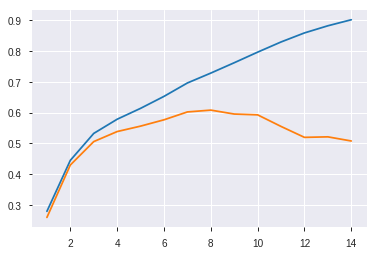

In [269]:
plt.plot(max_depth_arr, metric_train_arr)
plt.plot(max_depth_arr, metric_valid_arr)

#### Random Forest

In [270]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [271]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=14, model=RFR)

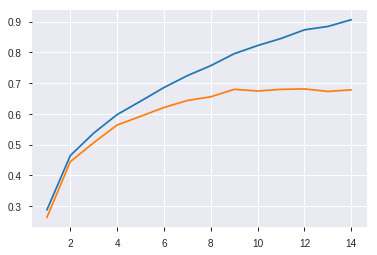

In [272]:
plt.plot(max_depth_arr, metric_train_arr)
plt.plot(max_depth_arr, metric_valid_arr)

In [273]:
np.max(metric_valid_arr)

0.6809725502807001

In [274]:
metric_valid_arr

[0.263015910458093,
 0.4444587081357303,
 0.5060933042113472,
 0.5636382354970482,
 0.5918565812182353,
 0.6205924216358532,
 0.6434142532987435,
 0.6554185053055164,
 0.6796900906549626,
 0.6741823319410862,
 0.6795963405703789,
 0.6809725502807001,
 0.6727644835184492,
 0.6779600824840768]

In [275]:
model = RFR(max_depth=12, random_state=42)

In [276]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Test

In [277]:
test = pd.read_csv('/home/mikhail/Рабочий стол/Geek_Script_2605/Kurs_project_task/test.csv')

In [278]:
test = add_mean_price(test)

In [279]:
test['Price'] = model.predict(test.loc[:, feats])

In [280]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mean_price,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,214712.570509,177020.335967
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,214712.570509,233350.349282
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,214712.570509,164504.267025
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,214712.570509,385984.933739
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,214712.570509,133573.489375


In [281]:
test.loc[:, ['Id', 'Price']].to_csv('MTabunov_fin_0207.csv', index=None)